### 一 数据预处理

- 查看基本数据情况
  - info()
  - head()

- 删除没用变量

  - 使用drop([],axis = 1,inplace = True) 删除不需要的变量

- 空值，异常值，处理（年龄过大 删除）

  - 年龄>10 <80

- 类别型变量转换成数字型

  - mobike['tripduation'] = mobike['tripduration'].str.replace(',','').astype(int)
  - mobike.age.str.replace('\'','').replace(' ','0').astype(int)

  pd.get_dummies()

- 处理时间数据，转换变量格式

  pd.to_datetime()

### 二 数据标准化

-  选择合适的特征，进行数据标准化
- 相关性分析
  - dataframe.corr()
  - sns.heatmap(df.corr)

### 三 建立kmeans模型

- 尝试不同分类
- 建模后不同维度分群结果分析
- 使用轮廓系数评估模型效果

### 四 业务解读

| column            | definition |
| ----------------- | ---------- |
| user_id           | 用户编码   |
| start_time        | 开始时间   |
| end_time          | 结束时间   |
| timeduration      | 骑行时长   |
| bikeid            | 自行车编码 |
| tripduration      | 骑行距离   |
| from_station_id   | 开始站编码 |
| from_station_name | 开始站名字 |
| to_station_id     | 结束站编码 |
| to_station_name   | 结束站名字 |
| usertype          | 用户种类   |
| gender            | 性别       |
| birthyear         | 出生年份   |
| age               | 年龄       |



In [97]:
import pandas as pd
mobike_data = pd.read_csv("./mobike.csv")

In [98]:
mobike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6427 entries, 0 to 6426
Data columns (total 15 columns):
Unnamed: 0           6427 non-null int64
user_id              6427 non-null int64
start_time           6427 non-null object
end_time             6427 non-null object
timeduration         6427 non-null int64
bikeid               6427 non-null int64
tripduration         6427 non-null object
from_station_id      6427 non-null int64
from_station_name    6427 non-null object
to_station_id        6427 non-null int64
to_station_name      6427 non-null object
usertype             6427 non-null object
gender               5938 non-null object
birthyear            5956 non-null float64
age                  6427 non-null object
dtypes: float64(1), int64(6), object(8)
memory usage: 753.2+ KB


In [99]:
mobike_data.describe()

,Unnamed: 0,user_id,timeduration,bikeid,from_station_id,to_station_id,birthyear
count,6427.000000,6.427000e+03,6427.000000,6427.000000,6427.000000,6427.000000,5956.000000
mean,317005.228411,2.135519e+07,11.778902,3491.637934,195.038432,198.502567,1982.488583
std,184583.896111,2.181294e+05,9.692236,1912.171846,148.170025,148.939873,11.147859
min,51.000000,2.098358e+07,0.000000,2.000000,2.000000,2.000000,1906.000000
25%,159093.000000,2.116805e+07,5.000000,1852.000000,77.000000,80.000000,1977.000000
50%,314569.000000,2.135114e+07,9.000000,3618.000000,168.000000,172.000000,1986.000000
75%,476273.500000,2.154376e+07,15.000000,5179.500000,287.000000,287.000000,1991.000000
max,642522.000000,2.174223e+07,59.000000,6470.000000,662.000000,661.000000,2002.000000


In [100]:
mobike_data.shape

(6427, 15)

In [101]:
mobike_data.head()

,Unnamed: 0,user_id,start_time,end_time,timeduration,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age
0,439283,21499218,11/14/2018 7:37,11/14/2018 7:44,7,2631,436,319,Greenview Ave & Diversey Pkwy,67,Sheffield Ave & Fullerton Ave,Subscriber,Male,1982.0,37
1,603317,21694389,12/18/2018 19:02,12/18/2018 19:10,7,1565,445,164,Franklin St & Lake St,195,Columbus Dr & Randolph St,Subscriber,Male,1988.0,31
2,109957,21110722,10/9/2018 12:37,10/9/2018 12:55,18,2231,"1,090",163,Damen Ave & Clybourn Ave,69,Damen Ave & Pierce Ave,Customer,Male,1989.0,30
3,428082,21485409,11/12/2018 12:30,11/12/2018 12:40,9,4226,581,226,Racine Ave & Belmont Ave,308,Seeley Ave & Roscoe St,Subscriber,Female,1989.0,30
4,395437,21445994,11/7/2018 7:29,11/7/2018 7:35,6,3475,390,77,Clinton St & Madison St,621,Aberdeen St & Randolph St,Subscriber,Male,1979.0,40


In [102]:
import numpy as np
np.any(pd.isnull(mobike_data))

True

In [103]:
# 删除没用的特征值
mobike_data.drop('Unnamed: 0',axis = 1,inplace = True)

In [104]:
mobike_data.head()

,user_id,start_time,end_time,timeduration,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age
0,21499218,11/14/2018 7:37,11/14/2018 7:44,7,2631,436,319,Greenview Ave & Diversey Pkwy,67,Sheffield Ave & Fullerton Ave,Subscriber,Male,1982.0,37
1,21694389,12/18/2018 19:02,12/18/2018 19:10,7,1565,445,164,Franklin St & Lake St,195,Columbus Dr & Randolph St,Subscriber,Male,1988.0,31
2,21110722,10/9/2018 12:37,10/9/2018 12:55,18,2231,"1,090",163,Damen Ave & Clybourn Ave,69,Damen Ave & Pierce Ave,Customer,Male,1989.0,30
3,21485409,11/12/2018 12:30,11/12/2018 12:40,9,4226,581,226,Racine Ave & Belmont Ave,308,Seeley Ave & Roscoe St,Subscriber,Female,1989.0,30
4,21445994,11/7/2018 7:29,11/7/2018 7:35,6,3475,390,77,Clinton St & Madison St,621,Aberdeen St & Randolph St,Subscriber,Male,1979.0,40


In [105]:
mobike_data.groupby(['age']).count()

,user_id,start_time,end_time,timeduration,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
age,,,,,,,,,,,,,
,471,471,471,471,471,471,471,471,471,471,471,0,0
101,2,2,2,2,2,2,2,2,2,2,2,2,2
113,1,1,1,1,1,1,1,1,1,1,1,0,1
17,2,2,2,2,2,2,2,2,2,2,2,2,2
18,7,7,7,7,7,7,7,7,7,7,7,7,7
19,18,18,18,18,18,18,18,18,18,18,18,18,18
20,50,50,50,50,50,50,50,50,50,50,50,50,50
21,35,35,35,35,35,35,35,35,35,35,35,35,35
22,33,33,33,33,33,33,33,33,33,33,33,33,33


In [106]:
mobike_data['age']=mobike_data.age.str.replace('\'','').replace(' ','0').astype(int)

In [107]:
mobike_data.describe()

,user_id,timeduration,bikeid,from_station_id,to_station_id,birthyear,age
count,6.427000e+03,6427.000000,6427.000000,6427.000000,6427.000000,5956.000000,6427.000000
mean,2.135519e+07,11.778902,3491.637934,195.038432,198.502567,1982.488583,33.835693
std,2.181294e+05,9.692236,1912.171846,148.170025,148.939873,11.147859,14.342768
min,2.098358e+07,0.000000,2.000000,2.000000,2.000000,1906.000000,0.000000
25%,2.116805e+07,5.000000,1852.000000,77.000000,80.000000,1977.000000,27.000000
50%,2.135114e+07,9.000000,3618.000000,168.000000,172.000000,1986.000000,32.000000
75%,2.154376e+07,15.000000,5179.500000,287.000000,287.000000,1991.000000,41.000000
max,2.174223e+07,59.000000,6470.000000,662.000000,661.000000,2002.000000,113.000000


In [108]:
# age异常值处理
mobike_data = mobike_data[mobike_data['age']<=70]
mobike_data = mobike_data[mobike_data['age']>=18]

In [109]:
mobike_data.describe()

,user_id,timeduration,bikeid,from_station_id,to_station_id,birthyear,age
count,5.939000e+03,5939.000000,5939.000000,5939.000000,5939.000000,5939.000000,5939.000000
mean,2.136120e+07,10.817309,3506.519448,196.996969,201.032665,1982.591177,36.408823
std,2.182745e+05,8.477247,1916.098846,148.159023,148.888064,10.924396,10.924396
min,2.098358e+07,0.000000,2.000000,2.000000,3.000000,1949.000000,18.000000
25%,2.117430e+07,5.000000,1853.500000,77.000000,81.000000,1977.000000,28.000000
50%,2.136393e+07,8.000000,3637.000000,172.000000,174.000000,1986.000000,33.000000
75%,2.154985e+07,14.000000,5207.500000,288.000000,288.000000,1991.000000,42.000000
max,2.174223e+07,59.000000,6470.000000,662.000000,661.000000,2001.000000,70.000000


In [110]:
mobike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5939 entries, 0 to 6426
Data columns (total 14 columns):
user_id              5939 non-null int64
start_time           5939 non-null object
end_time             5939 non-null object
timeduration         5939 non-null int64
bikeid               5939 non-null int64
tripduration         5939 non-null object
from_station_id      5939 non-null int64
from_station_name    5939 non-null object
to_station_id        5939 non-null int64
to_station_name      5939 non-null object
usertype             5939 non-null object
gender               5922 non-null object
birthyear            5939 non-null float64
age                  5939 non-null int32
dtypes: float64(1), int32(1), int64(5), object(7)
memory usage: 672.8+ KB


In [111]:
# 判断是否有空值
mobike_data.isnull().any() 

user_id              False
start_time           False
end_time             False
timeduration         False
bikeid               False
tripduration         False
from_station_id      False
from_station_name    False
to_station_id        False
to_station_name      False
usertype             False
gender                True
birthyear            False
age                  False
dtype: bool

In [112]:
# 填补性别的缺失值
mobike_data.gender.fillna("un",inplace=True)

In [113]:
# 判断是否有空值
mobike_data.isnull().any() 

user_id              False
start_time           False
end_time             False
timeduration         False
bikeid               False
tripduration         False
from_station_id      False
from_station_name    False
to_station_id        False
to_station_name      False
usertype             False
gender               False
birthyear            False
age                  False
dtype: bool

In [114]:
mobike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5939 entries, 0 to 6426
Data columns (total 14 columns):
user_id              5939 non-null int64
start_time           5939 non-null object
end_time             5939 non-null object
timeduration         5939 non-null int64
bikeid               5939 non-null int64
tripduration         5939 non-null object
from_station_id      5939 non-null int64
from_station_name    5939 non-null object
to_station_id        5939 non-null int64
to_station_name      5939 non-null object
usertype             5939 non-null object
gender               5939 non-null object
birthyear            5939 non-null float64
age                  5939 non-null int32
dtypes: float64(1), int32(1), int64(5), object(7)
memory usage: 672.8+ KB


In [115]:
mobike_= mobike_data[['usertype','gender']]

In [116]:
# 统计gender的值属性
mobike_data['gender'].value_counts()

Male      4623
Female    1299
un          17
Name: gender, dtype: int64

In [117]:
mobike_['tripduation'] = mobike_data['tripduration'].str.replace(',','').astype(int)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [118]:
mobike_.head()

,usertype,gender,tripduation
0,Subscriber,Male,436
1,Subscriber,Male,445
2,Customer,Male,1090
3,Subscriber,Female,581
4,Subscriber,Male,390


In [119]:
# 
mobike_one_hot = pd.concat([mobike_data,pd.get_dummies(mobike_)],axis=1)

In [120]:
mobike_one_hot

,user_id,start_time,end_time,timeduration,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,tripduation,usertype_Customer,usertype_Subscriber,gender_Female,gender_Male,gender_un
0,21499218,11/14/2018 7:37,11/14/2018 7:44,7,2631,436,319,Greenview Ave & Diversey Pkwy,67,Sheffield Ave & Fullerton Ave,Subscriber,Male,1982.0,37,436,0,1,0,1,0
1,21694389,12/18/2018 19:02,12/18/2018 19:10,7,1565,445,164,Franklin St & Lake St,195,Columbus Dr & Randolph St,Subscriber,Male,1988.0,31,445,0,1,0,1,0
2,21110722,10/9/2018 12:37,10/9/2018 12:55,18,2231,"1,090",163,Damen Ave & Clybourn Ave,69,Damen Ave & Pierce Ave,Customer,Male,1989.0,30,1090,1,0,0,1,0
3,21485409,11/12/2018 12:30,11/12/2018 12:40,9,4226,581,226,Racine Ave & Belmont Ave,308,Seeley Ave & Roscoe St,Subscriber,Female,1989.0,30,581,0,1,1,0,0
4,21445994,11/7/2018 7:29,11/7/2018 7:35,6,3475,390,77,Clinton St & Madison St,621,Aberdeen St & Randolph St,Subscriber,Male,1979.0,40,390,0,1,0,1,0
5,21068843,10/6/2018 12:04,10/6/2018 12:17,12,2173,772,321,Wabash Ave & 9th St,134,Peoria St & Jackson Blvd,Subscriber,Male,1994.0,25,772,0,1,0,1,0
6,21354901,10/29/2018 17:26,10/29/2018 17:35,8,1735,505,90,Millennium Park,255,Indiana Ave & Roosevelt Rd,Subscriber,Female,1971.0,48,505,0,1,1,0,0
8,21373047,10/31/2018 6:15,10/31/2018 6:29,13,2178,819,77,Clinton St & Madison St,331,Halsted St & Clybourn Ave (*),Subscriber,Male,1991.0,28,819,0,1,0,1,0
9,21288683,10/23/2018 18:11,10/23/2018 18:14,3,3888,225,74,Kingsbury St & Erie St,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,30,225,0,1,0,1,0
10,21146269,10/11/2018 17:10,10/11/2018 17:26,16,5245,973,73,Jefferson St & Monroe St,118,Sedgwick St & North Ave,Subscriber,Male,1992.0,27,973,0,1,0,1,0


In [121]:
mobike_one_hot.columns

Index(['user_id', 'start_time', 'end_time', 'timeduration', 'bikeid',
       'tripduration', 'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'age',
       'tripduation', 'usertype_Customer', 'usertype_Subscriber',
       'gender_Female', 'gender_Male', 'gender_un'],
      dtype='object')

In [122]:
# 提取关键的特征值
mobike_= mobike_one_hot[['timeduration','tripduration', 'age',
       'usertype_Customer', 'usertype_Subscriber', 'gender_Female',
       'gender_Male']]

In [123]:
mobike_3 = mobike_one_hot[['timeduration','tripduration', 'age',
       'usertype_Customer', 'usertype_Subscriber', 'gender_Female',
       'gender_Male']]

In [124]:
# 去掉逗号
mobike_3['tripduration'] = mobike_3['tripduration'].str.replace(',','').astype(int)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [125]:
mobike_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5939 entries, 0 to 6426
Data columns (total 7 columns):
timeduration           5939 non-null int64
tripduration           5939 non-null int32
age                    5939 non-null int32
usertype_Customer      5939 non-null uint8
usertype_Subscriber    5939 non-null uint8
gender_Female          5939 non-null uint8
gender_Male            5939 non-null uint8
dtypes: int32(2), int64(1), uint8(4)
memory usage: 162.4 KB


In [126]:
from sklearn.cluster import KMeans
# 开始KMeans分类建模
model = KMeans(n_clusters=4,random_state=20)
model.fit(mobike_3)
mobike_3['cluster'] = model.labels_

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [127]:
mobike_3.groupby(['cluster']).age.count()

cluster
0    5903
1       1
2       4
3      31
Name: age, dtype: int64

In [128]:
# 骑行距离数据标准化
mobike_3['tripduration']=(mobike_3['tripduration']-mobike_3['tripduration'].mean())/mobike_3['tripduration'].std()
#（收入-收入均值）/收入标准差
mobike_3['timeduration']=(mobike_3['timeduration']-mobike_3['timeduration'].mean())/mobike_3['timeduration'].std()

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [129]:
mobike_3.head()

,timeduration,tripduration,age,usertype_Customer,usertype_Subscriber,gender_Female,gender_Male,cluster
0,-0.450301,-0.107100,37,0,1,0,1,0
1,-0.450301,-0.104401,31,0,1,0,1,0
2,0.847290,0.089056,30,1,0,0,1,0
3,-0.214375,-0.063610,30,0,1,1,0,0
4,-0.568263,-0.120897,40,0,1,0,1,0


In [130]:
mobike_3.columns

Index(['timeduration', 'tripduration', 'age', 'usertype_Customer',
       'usertype_Subscriber', 'gender_Female', 'gender_Male', 'cluster'],
      dtype='object')

In [131]:
# KMeans分类
model = KMeans(n_clusters=3,random_state=2)
model.fit(mobike_3[['timeduration', 'tripduration', 'age', 'usertype_Customer',
       'usertype_Subscriber', 'gender_Female', 'gender_Male']])
mobike_3['cluster'] = model.labels_

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [132]:
mobike_3.head()

,timeduration,tripduration,age,usertype_Customer,usertype_Subscriber,gender_Female,gender_Male,cluster
0,-0.450301,-0.107100,37,0,1,0,1,2
1,-0.450301,-0.104401,31,0,1,0,1,0
2,0.847290,0.089056,30,1,0,0,1,0
3,-0.214375,-0.063610,30,0,1,1,0,0
4,-0.568263,-0.120897,40,0,1,0,1,2


In [133]:
mobike_3.groupby('cluster').age.describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,3039.0,28.123067,3.232996,18.0,26.0,28.0,31.0,33.0
1,1062.0,55.733522,5.448031,48.0,51.0,55.0,59.0,70.0
2,1838.0,38.942873,3.929911,34.0,35.0,38.0,42.0,47.0


In [134]:
# kmeans.inertia_ 越小越好 评估的套路
# 评估
error = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(mobike_3[['timeduration','tripduration', 'age',
       'usertype_Customer', 'usertype_Subscriber', 'gender_Female',
       'gender_Male']])
    error.append(kmeans.inertia_)

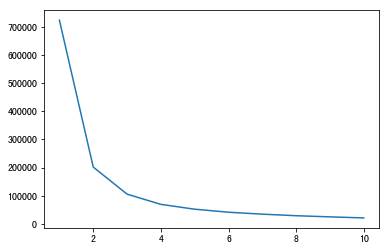

In [135]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),error)

In [136]:
from sklearn.metrics import silhouette_score
# 模型评估
x_cluster = model.fit_predict(mobike_3[['timeduration','tripduration', 'age',
       'usertype_Customer', 'usertype_Subscriber', 'gender_Female',
       'gender_Male']])
silhouette_score(mobike_3[['timeduration','tripduration', 'age',
       'usertype_Customer', 'usertype_Subscriber', 'gender_Female',
       'gender_Male']],x_cluster)

0.5473477831648853

In [137]:
# model.cluster_centers_ 每一个群的中心点
centers = pd.DataFrame(model.cluster_centers_,columns=['timeduration','tripduration', 'age',
       'usertype_Customer', 'usertype_Subscriber', 'gender_Female',
       'gender_Male'])
centers

,timeduration,tripduration,age,usertype_Customer,usertype_Subscriber,gender_Female,gender_Male
0,-0.022312,0.007101,28.123067,0.041132,0.958868,0.257321,0.740375
1,0.054762,0.022793,55.733522,0.025424,0.974576,0.179849,0.817326
2,0.005249,-0.024910,38.942873,0.031012,0.968988,0.177367,0.818825


In [138]:
mobike_3.head()

,timeduration,tripduration,age,usertype_Customer,usertype_Subscriber,gender_Female,gender_Male,cluster
0,-0.450301,-0.107100,37,0,1,0,1,2
1,-0.450301,-0.104401,31,0,1,0,1,0
2,0.847290,0.089056,30,1,0,0,1,0
3,-0.214375,-0.063610,30,0,1,1,0,0
4,-0.568263,-0.120897,40,0,1,0,1,2


In [139]:
### 聚类完成